In [1]:
import numpy as np
import scipy
import pandas
import treelib
import pyclust
import pandas

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pyclust.__version__

'0.0.8'

In [3]:
s1 = np.array([[0.02, 0.05], [0.5, 2.0]])
s2 = np.array([[0.6, 0.0], [0.0, 1.1]])
#s3 = np.array([[0.4, -0.5], [-0.04, 0.3]])
s3 = np.array([[0.4, -0.5], [-0.02, 0.2]])

m1 = np.array([-2.0, 1.0])
m2 = np.array([0.0, -3.0])
m3 = np.array([1.0, 2.0])

X1 = np.random.multivariate_normal(mean=m1, cov=s1, size=200)
X2 = np.random.multivariate_normal(mean=m2, cov=s2, size=300)
X3 = np.random.multivariate_normal(mean=m3, cov=s3, size=100)

X = np.vstack((X1, X2, X3))

indx_arr = np.arange(X.shape[0])
np.random.shuffle(indx_arr)

y = np.hstack((np.zeros(200, dtype=int), np.ones(300, dtype=int), 2*np.ones(100, dtype=int)))
X = X[indx_arr,:]
y = y[indx_arr]

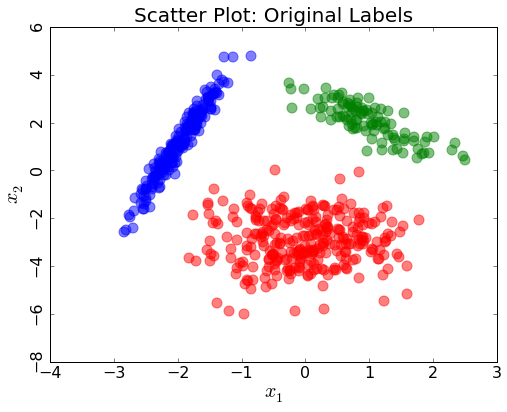

In [4]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()
    
## test plot original data
plot_scatter(X, labels=y, title="Scatter Plot: Original Labels")

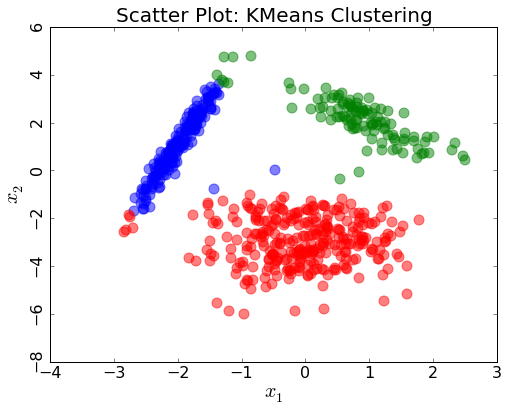

In [5]:
## Performing KMeans
km = pyclust.KMeans(n_clusters=3, n_trials=50)

km.fit(X)

plot_scatter(X, labels=km.labels_, title="Scatter Plot: KMeans Clustering")

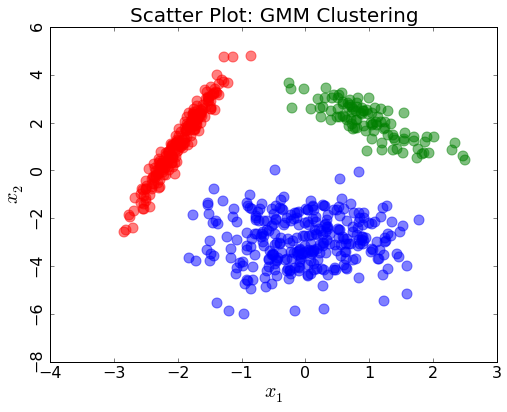

In [6]:
## Performing GMM
gmm = pyclust.GMM(n_clusters=3, n_trials=50)

gmm.fit(X)

plot_scatter(X, labels=gmm.predict(X), title="Scatter Plot: GMM Clustering")